In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import networkx as nx


In [2]:
# Load datasets
bar_df = pd.read_csv('bar_assignment.csv')  # Ensure this file is in the same directory
sankey_df = pd.read_csv('sankey_assignment.csv')
network_df = pd.read_csv('networks_assignment.csv')


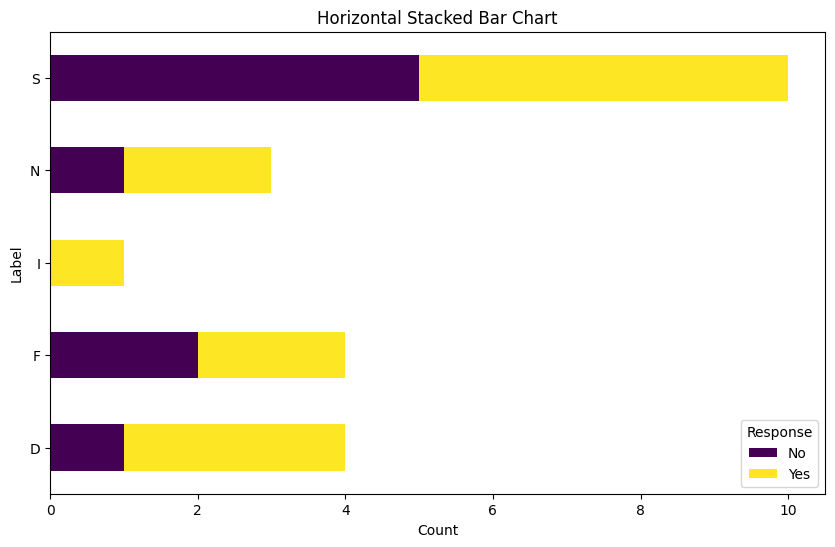

In [3]:
# Convert 1 to 'Yes' and 0 to 'No'
bar_df['COUNT'] = bar_df['COUNT'].map({1: 'Yes', 0: 'No'})

# Create a horizontal stacked bar chart
bar_pivot = bar_df.pivot_table(index='LABEL', columns='COUNT', aggfunc=len, fill_value=0)
bar_pivot.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Horizontal Stacked Bar Chart')
plt.xlabel('Count')
plt.ylabel('Label')
plt.legend(title='Response')
plt.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Load the dataset (Make sure the file is in the same directory as your notebook)
sankey_df = pd.read_csv('sankey_assignment.csv')

# Check if the data is loaded correctly
print(sankey_df.head())  # Display the first few rows

# Define sources and targets for Sankey Diagram
sources = []
targets = []
values = []

for col in sankey_df.columns[1:-3]:  # Excluding LABEL and the last three columns
    for index, row in sankey_df.iterrows():
        sources.append(row['LABEL'])
        targets.append(col)
        values.append(row[col])

# Define additional connections for the last three columns
for col in sankey_df.columns[-3:]:
    for index, row in sankey_df.iterrows():
        sources.append(col)
        targets.append(row[col])
        values.append(1)

# Create Sankey Diagram
sankey = go.Figure(go.Sankey(
    node=dict(label=list(set(sources + targets))),
    link=dict(
        source=[list(set(sources + targets)).index(s) for s in sources],
        target=[list(set(sources + targets)).index(t) for t in targets],
        value=values
    )
))
sankey.update_layout(title_text='Sankey Diagram', font_size=10)
sankey.show()



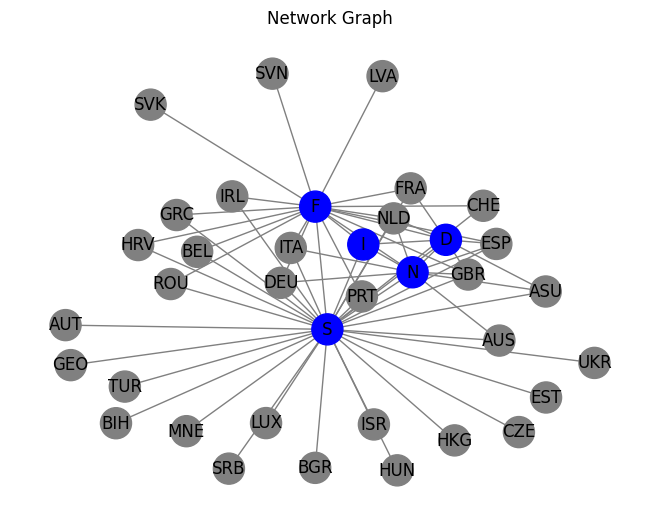

In [9]:
G = nx.Graph()

# Add nodes with colors
node_colors = {}
blue_nodes = {'D', 'F', 'I', 'N', 'S'}
green_nodes = {'BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA'}
yellow_nodes = {'AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP'}

for node in network_df['LABELS']:
    if node in blue_nodes:
        node_colors[node] = 'blue'
    elif node in green_nodes:
        node_colors[node] = 'green'
    elif node in yellow_nodes:
        node_colors[node] = 'yellow'
    else:
        node_colors[node] = 'gray'
    G.add_node(node, color=node_colors[node])

# Add edges
for index, row in network_df.iterrows():
    for col in network_df.columns[1:]:
        if row[col] > 0:
            G.add_edge(row['LABELS'], col)

# Draw network
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, 
        node_color=[node_colors.get(n, 'gray') for n in G.nodes()],  # Default to gray if missing
        edge_color='gray', node_size=500)
plt.title('Network Graph')
plt.show()


In [6]:
print("\n--- Explanation ---")
print("1. The bar chart is a horizontal stacked bar plot that transforms 1/0 into Yes/No.")
print("2. The Sankey Diagram connects specific columns to final categories ('Reg', 'Aca', 'Oth').")
print("3. The network graph shows central nodes ('D', 'F', 'I', 'N', 'S') in a pentagram with others outside.")
print("4. Colors are assigned as per the given specifications.")



--- Explanation ---
1. The bar chart is a horizontal stacked bar plot that transforms 1/0 into Yes/No.
2. The Sankey Diagram connects specific columns to final categories ('Reg', 'Aca', 'Oth').
3. The network graph shows central nodes ('D', 'F', 'I', 'N', 'S') in a pentagram with others outside.
4. Colors are assigned as per the given specifications.
